In [1]:
import matplotlib.pyplot as plt
from vis_creator import  VisCal, VisTrue


In [2]:
vc = VisCal("/data/scratch/apw737/catall_nobright/viscatBC_4c_b")
print("redcal rms", vc.get_rms())
vt = VisTrue("/data/scratch/apw737/catall_nobright/viscatBC_4c_b")
print("true sim rms", vt.get_rms())

Get V_obs from /data/scratch/apw737/catall_nobright/viscatBC_4c_b_g.uvh5


Telescope hera_sim is not in known_telescopes.


Get model from /data/scratch/apw737/catall_nobright/viscatBC_4c_b_g_cal_dict.npz
[[2, 11, 19, 32, 37, 41], [3, 12, 20, 27, 33, 38], [0, 9, 24, 30, 35, 42, 44], [6, 15, 23], [10, 18, 36, 40], [4, 13, 28, 34], [1, 25, 31, 43], [14, 22], [7, 16], [17, 39], [5, 29], [21], [8], [26]]
Get noise from /data/scratch/apw737/catall_nobright/viscatBC_4c_b_nn.npz
redcal rms 0.1929290054981194
Get true model from /data/scratch/apw737/catall_nobright/viscatBC_4c_b.uvh5
Get true gains from /data/scratch/apw737/catall_nobright/viscatBC_4c_b.calfits


Telescope hera_sim is not in known_telescopes.
telescope_location is not set. Using known values for HERA.
antenna_positions is not set. Using known values for HERA.
Telescope hera_sim is not in known_telescopes.


Get V_obs from /data/scratch/apw737/catall_nobright/viscatBC_4c_b_g.uvh5
true sim rms 0.25792528463027


### Plot the redcal g and V. 

Because redundant baselines exist, the V values are the V for redundant baseline groups

Plot the amplitudes then phases.

Plot g amp


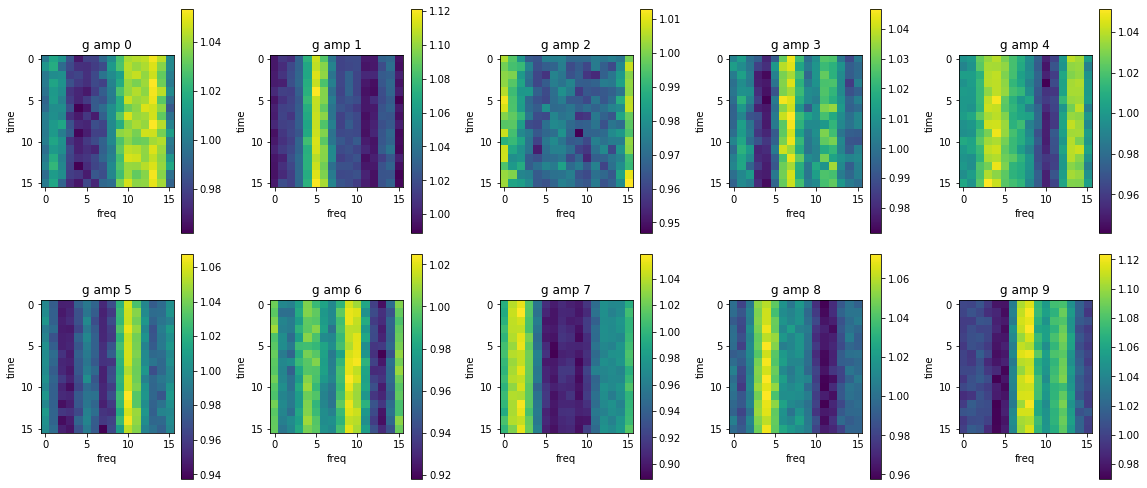

In [3]:
plt.rcParams['figure.figsize'] = [16, 7]
vc.plot_data("g", 5, "amp")

Plot g phase


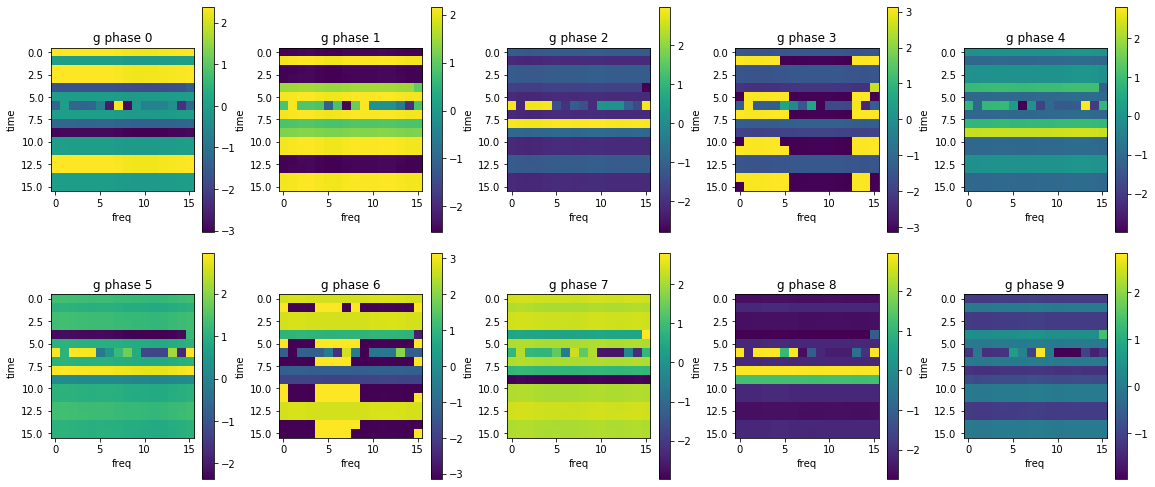

In [4]:
plt.rcParams['figure.figsize'] = [16, 7]
vc.plot_data("g", 5, "phase")

Plot V amp


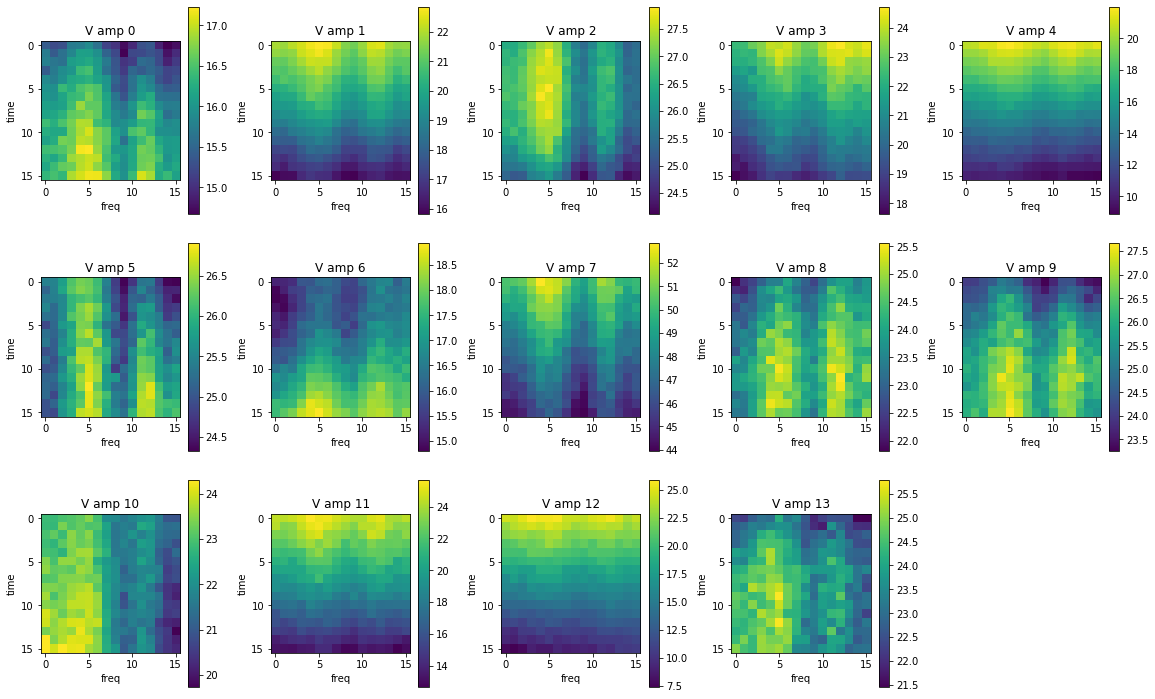

In [5]:
plt.rcParams['figure.figsize'] = [16, 10]
vc.plot_data("V", 5, "amp")
    

Plot V phase


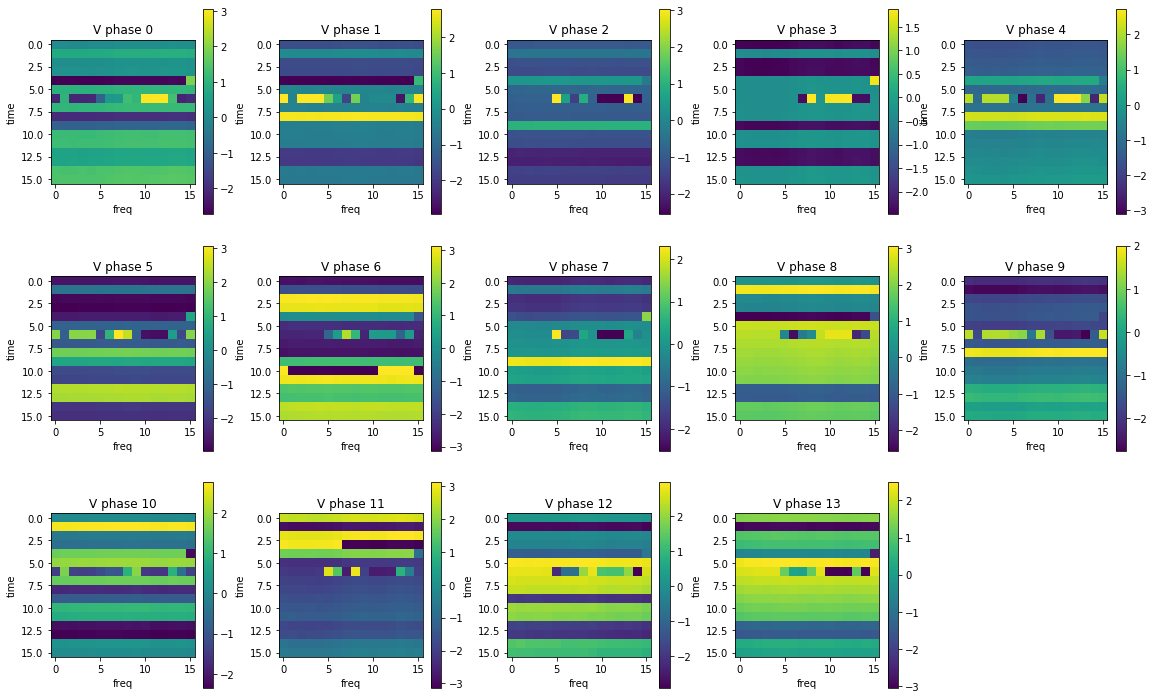

In [6]:
vc.plot_data("V", 5, "phase")

### Plot the simulated (true) g and V. 

There are no redundant groups. They could be grouped as determind by redcal, but the Vs won't be identical for all baselines in a group.

Plot the amplitudes then phases.

Plot g amp


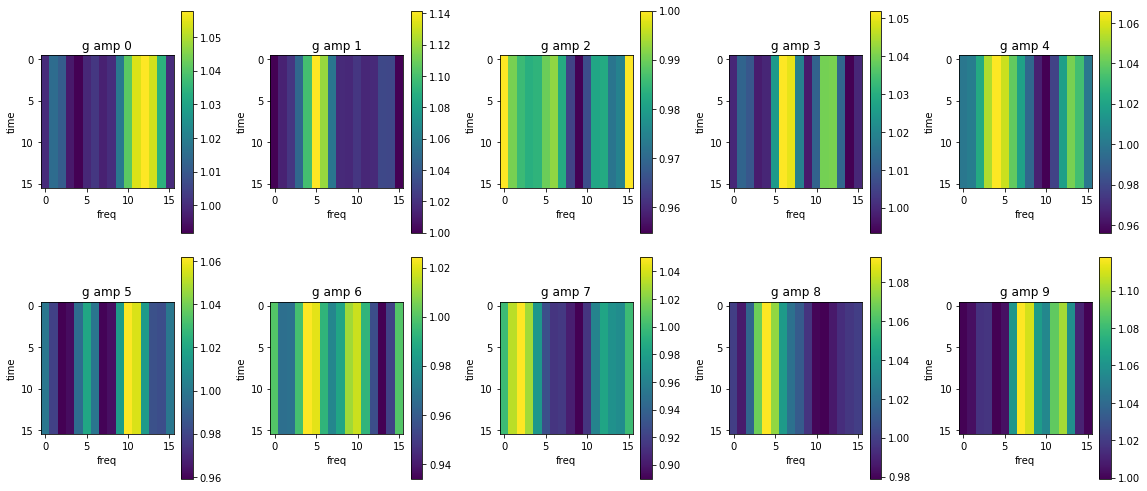

In [7]:
plt.rcParams['figure.figsize'] = [16, 7]
vt.plot_data("g", 5, "amp")

Plot g phase


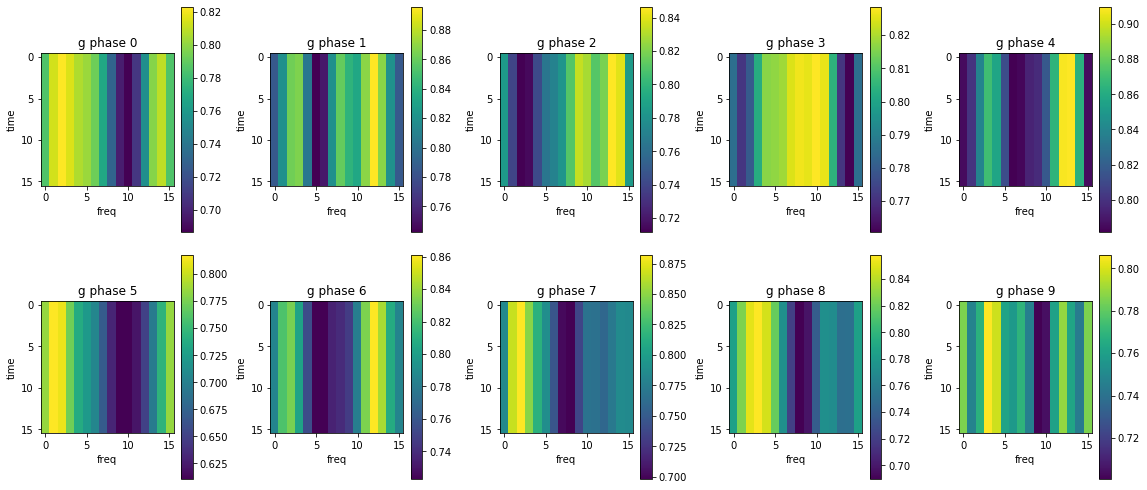

In [8]:
plt.rcParams['figure.figsize'] = [16, 7]
vt.plot_data("g", 5, "phase")

Plot V amp


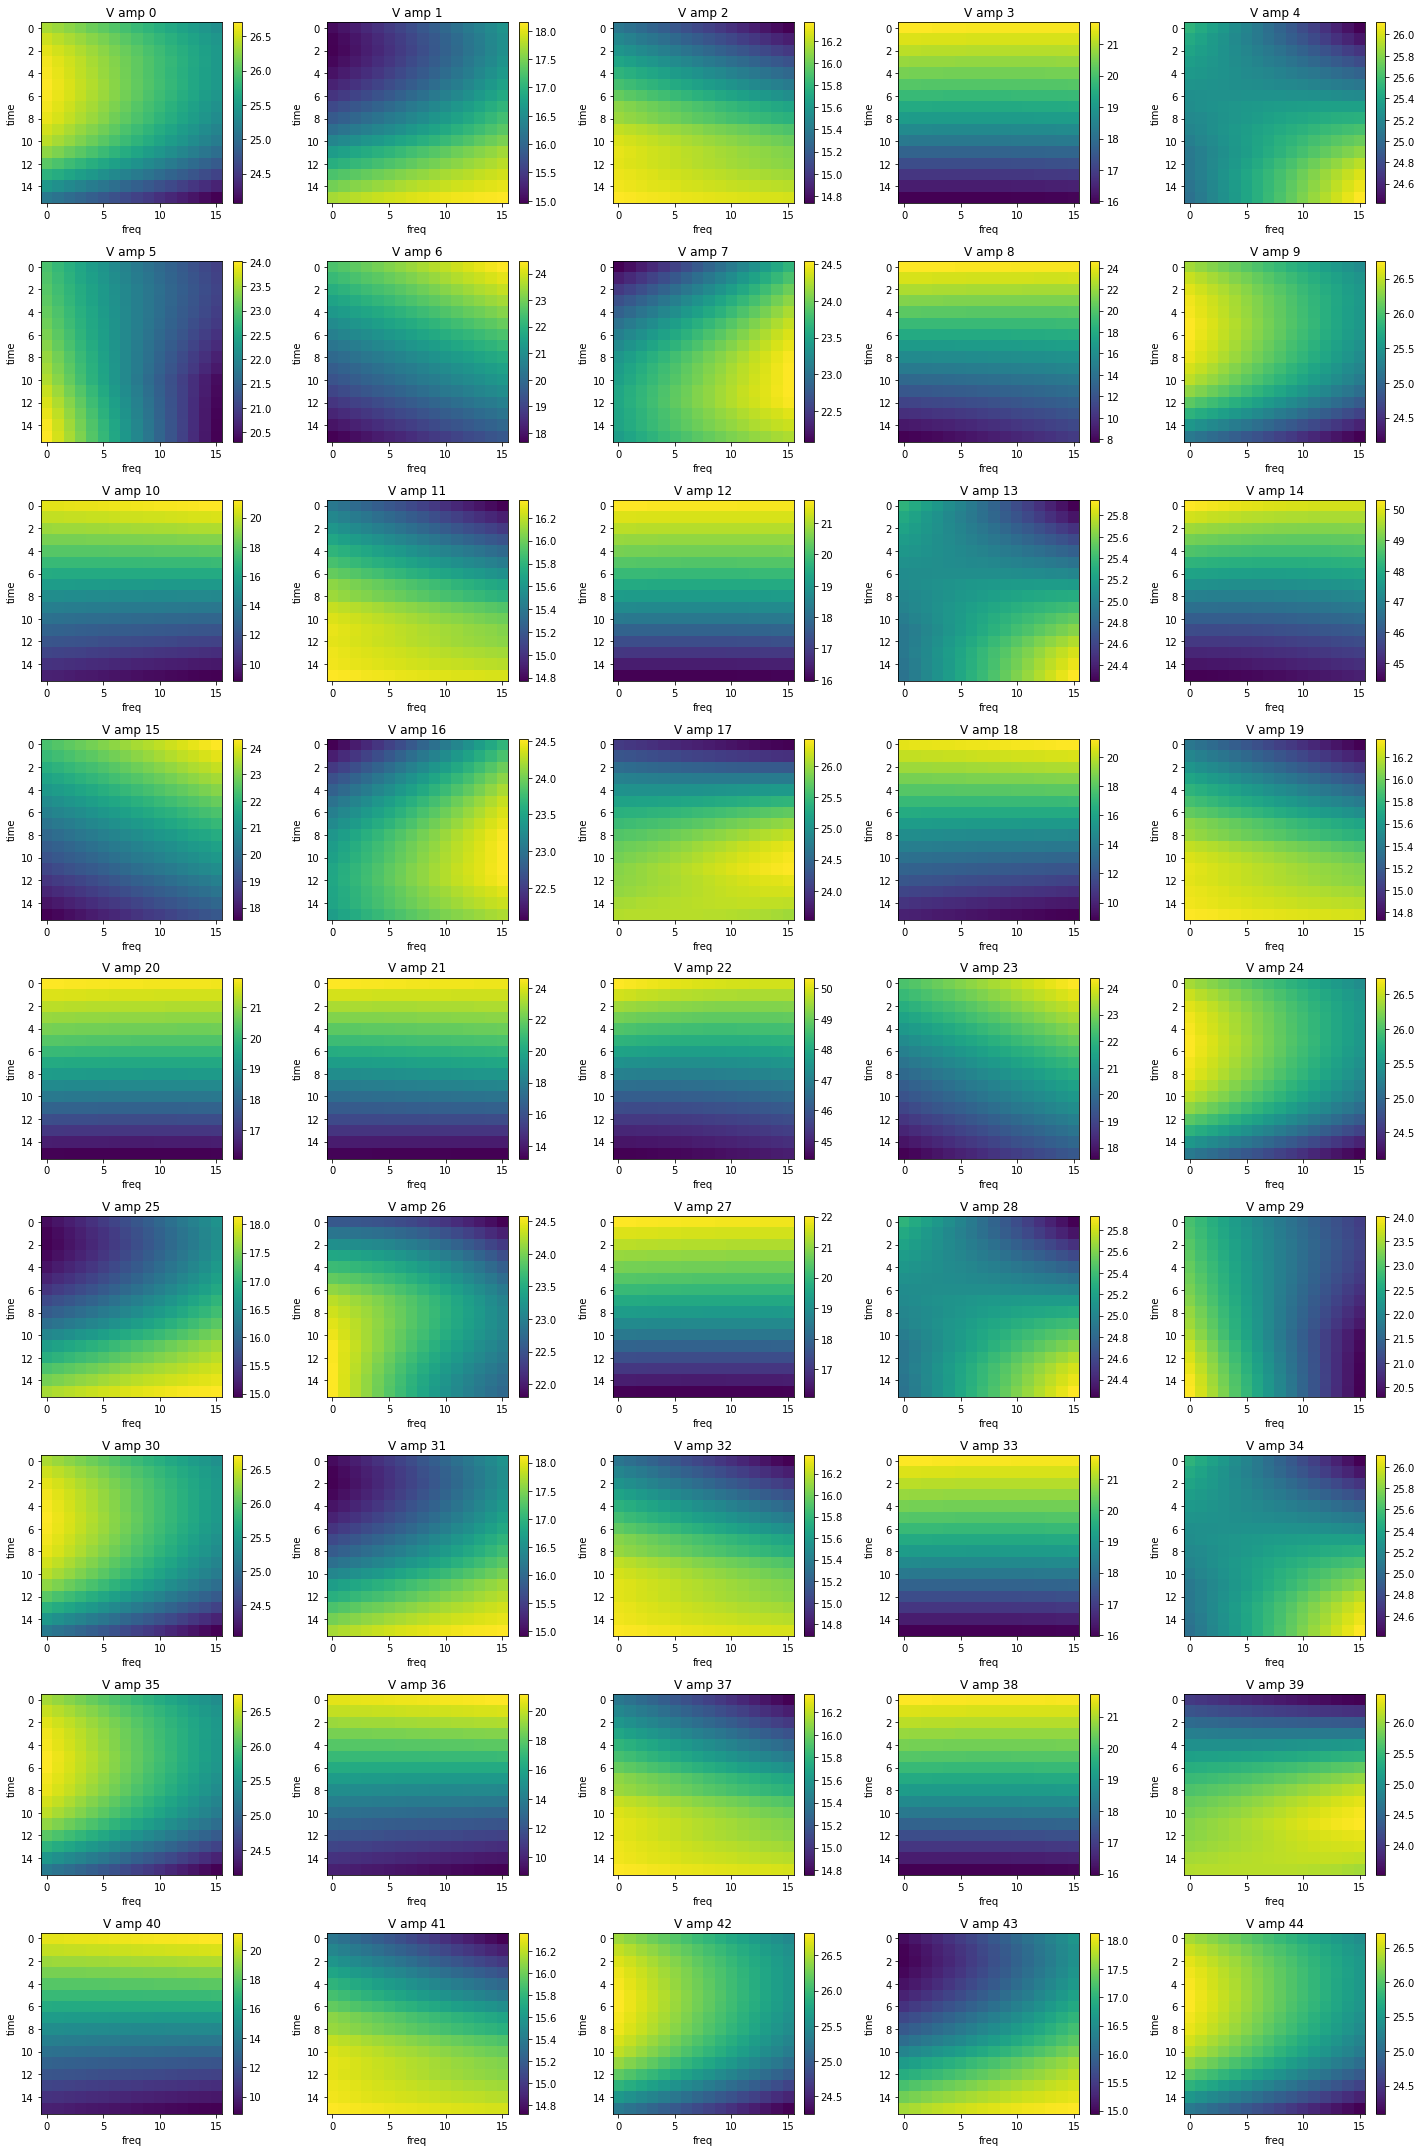

In [9]:
plt.rcParams['figure.figsize'] = [20, 30]
vt.plot_data("V", 5, "amp")

Plot V phase


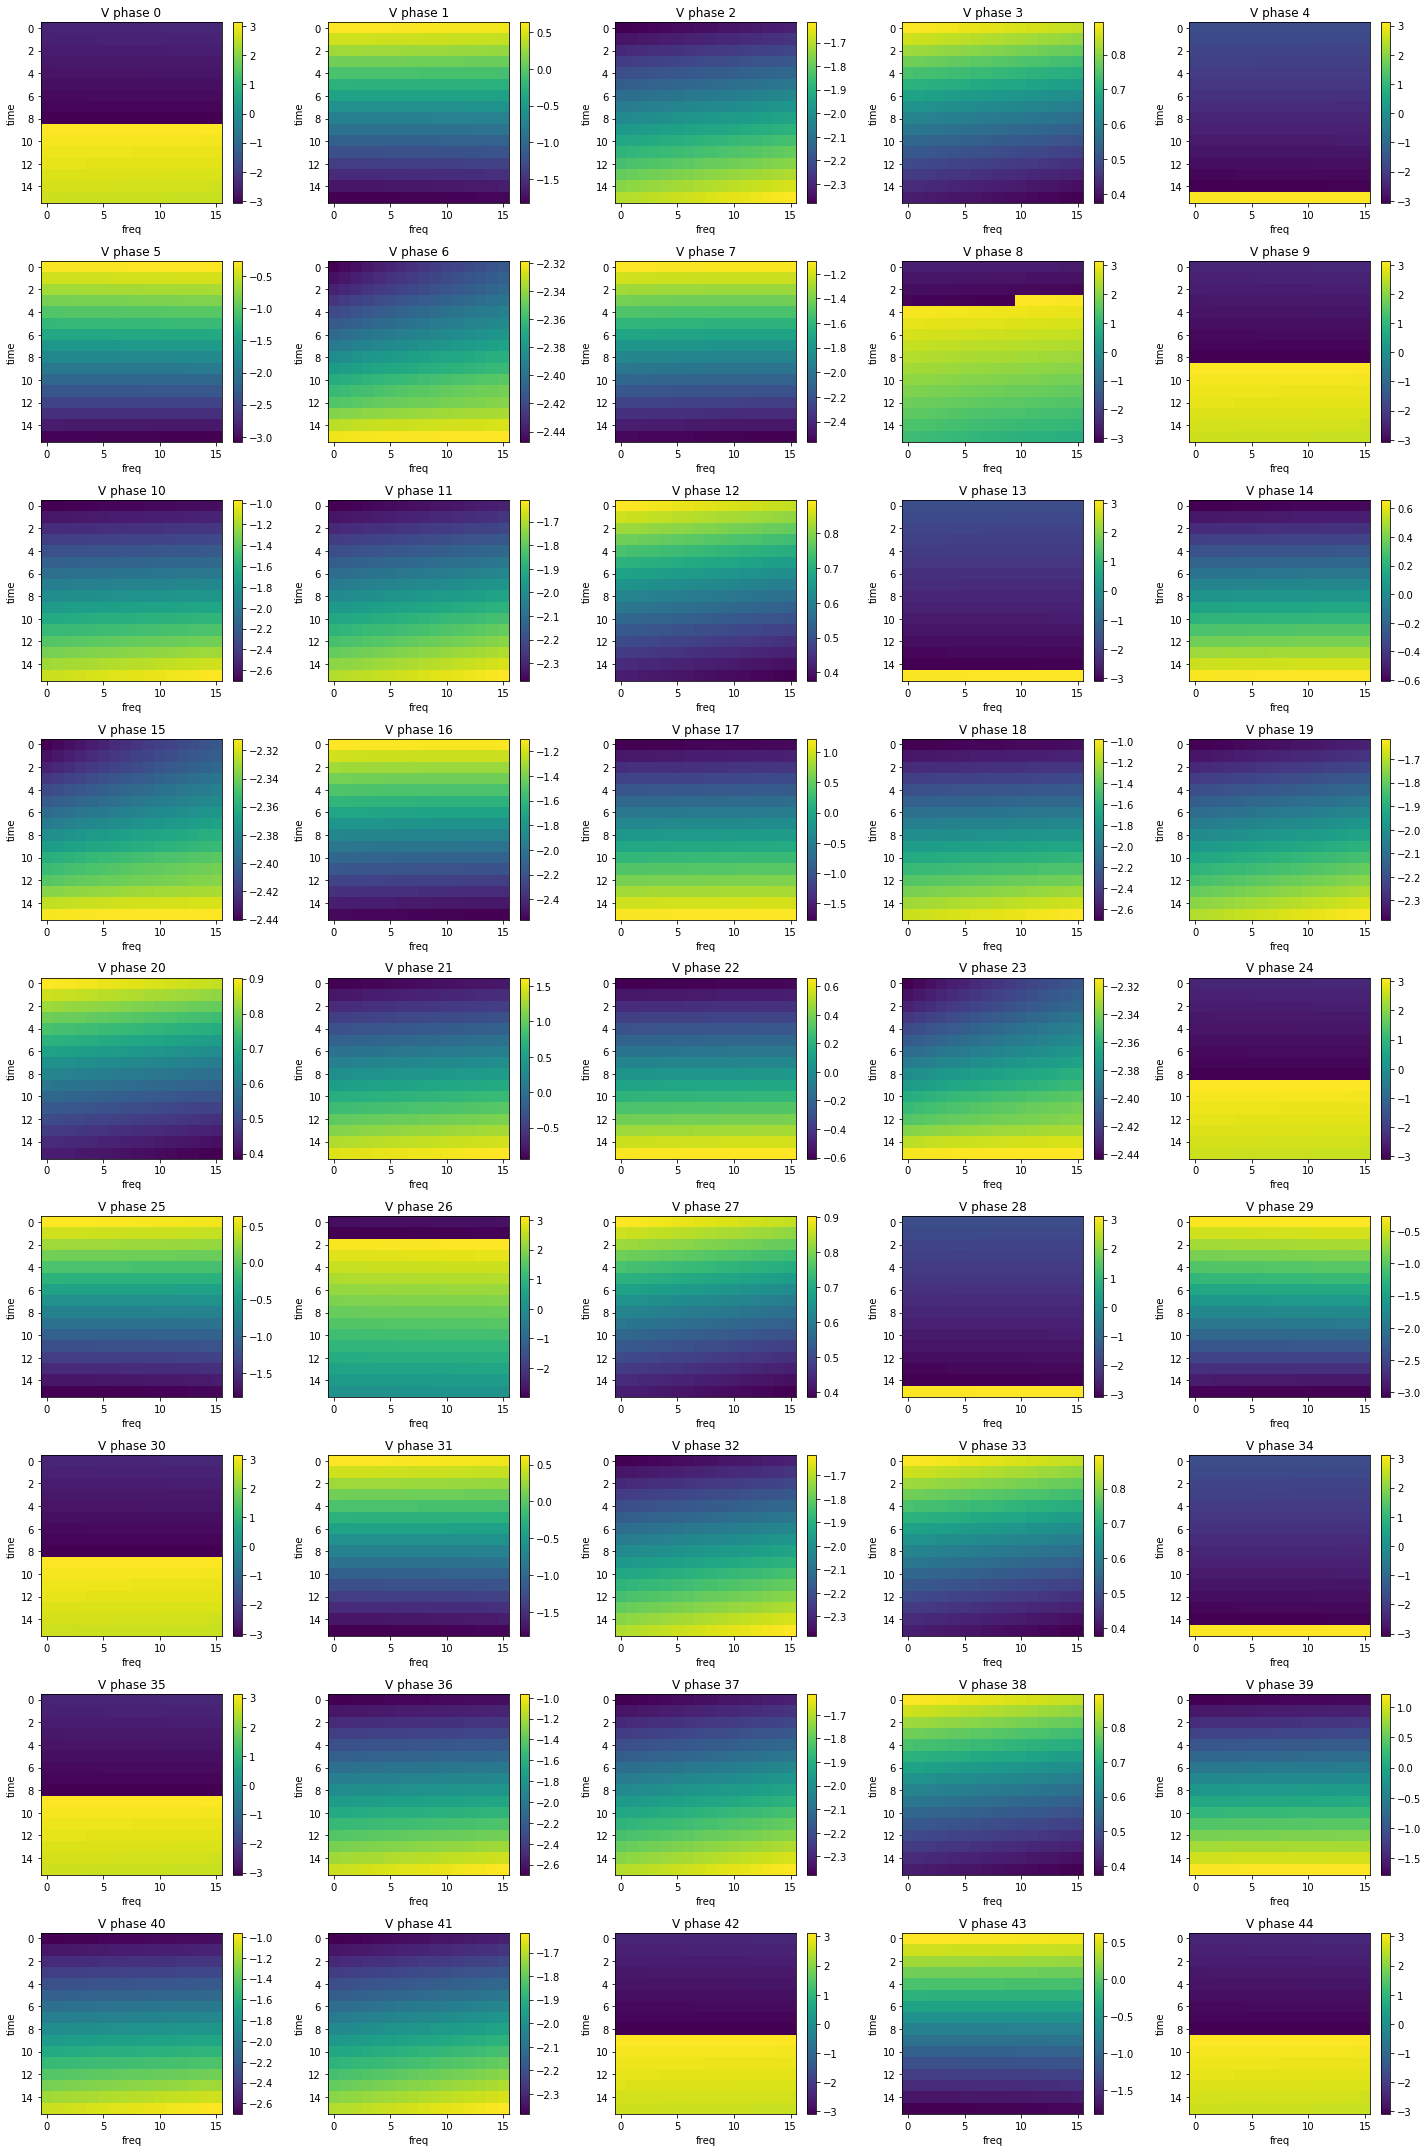

In [10]:
plt.rcParams['figure.figsize'] = [20, 30]
vt.plot_data("V", 5, "phase")